# Time Series

Simply put, a time series is any data put into chronological order.  Time Series Analysis therefore is simply an analysis of how a subject has behaved over time.

In [2]:
# The built-in Nile object is a dataset recording the measurements of the annual flow of the Nile river.
# It's class is "ts," for time series.
# Using the print() function on a time series object,
# we can examine the start date, and end date, as well as the measurements.
print(Nile)

Time Series:
Start = 1871 
End = 1970 
Frequency = 1 
  [1] 1120 1160  963 1210 1160 1160  813 1230 1370 1140  995  935 1110  994 1020
 [16]  960 1180  799  958 1140 1100 1210 1150 1250 1260 1220 1030 1100  774  840
 [31]  874  694  940  833  701  916  692 1020 1050  969  831  726  456  824  702
 [46] 1120 1100  832  764  821  768  845  864  862  698  845  744  796 1040  759
 [61]  781  865  845  944  984  897  822 1010  771  676  649  846  812  742  801
 [76] 1040  860  874  848  890  744  749  838 1050  918  986  797  923  975  815
 [91] 1020  906  901 1170  912  746  919  718  714  740


In [3]:
# Similarly to dataframes, we can view other metadata about this time series
length(Nile)
head(Nile, 5)
tail(Nile, 5)

# Right off the bat, we can already see that the last few values are much less than the first few.

[1] 100

[1] 1120 1160  963 1210 1160

[1] 746 919 718 714 740

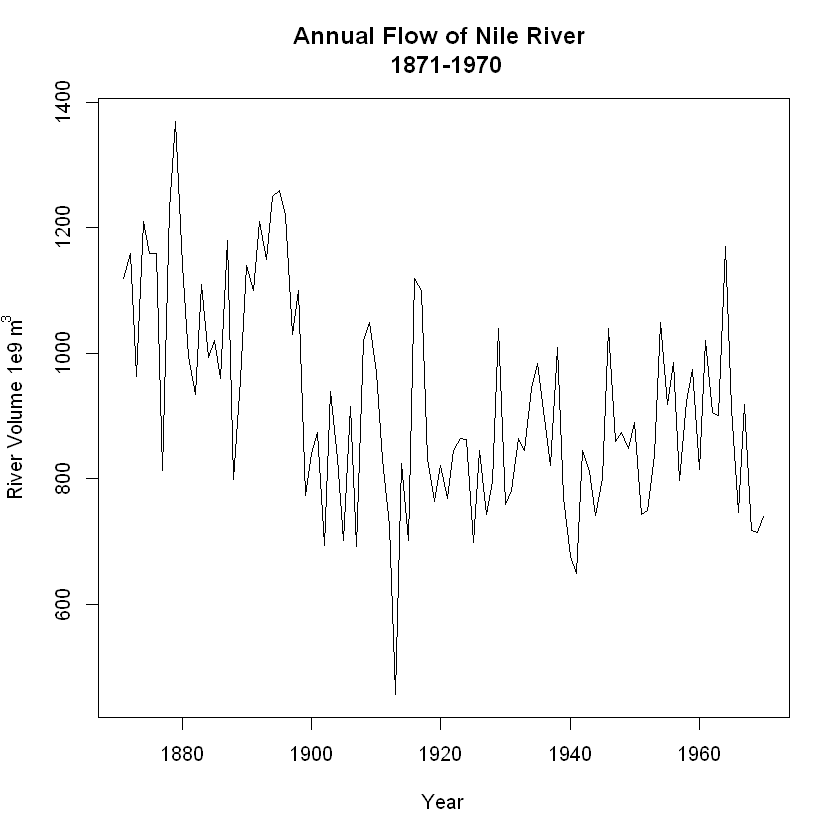

In [4]:
# Is it also useful to visualize your time series before digging any deeper.
plot(Nile, xlab="Year", ylab= expression('River Volume 1e9 m'^3) , main="Annual Flow of Nile River \n 1871-1970")

# Descriptive Information about Time Series

Time series data can come in a variety of formats.  Among these are:

1. Data that is exactly evenly-spaced, such as the temperature at every hour.
2. Data that is approximately evenly-spaced, such as the temperature recorded every time you stand up from your desk.
3. Data that is evenly spaced, but with missing values, such as the temperature recorded, but only during working hours.  This would give us a few consecutive hours, then a large pause, then another set of consecutive values, and so on.

Time series analysis begins with a few assumptions:
1. Consecutive observations are evenly-spaced.
2. A discrete time-observation index is used. 

In practice, this may only hold approximately.  Depending on the circumstances, we can sometimes ignore small discrepancies and perform our analysis as if the frequencies were exact.

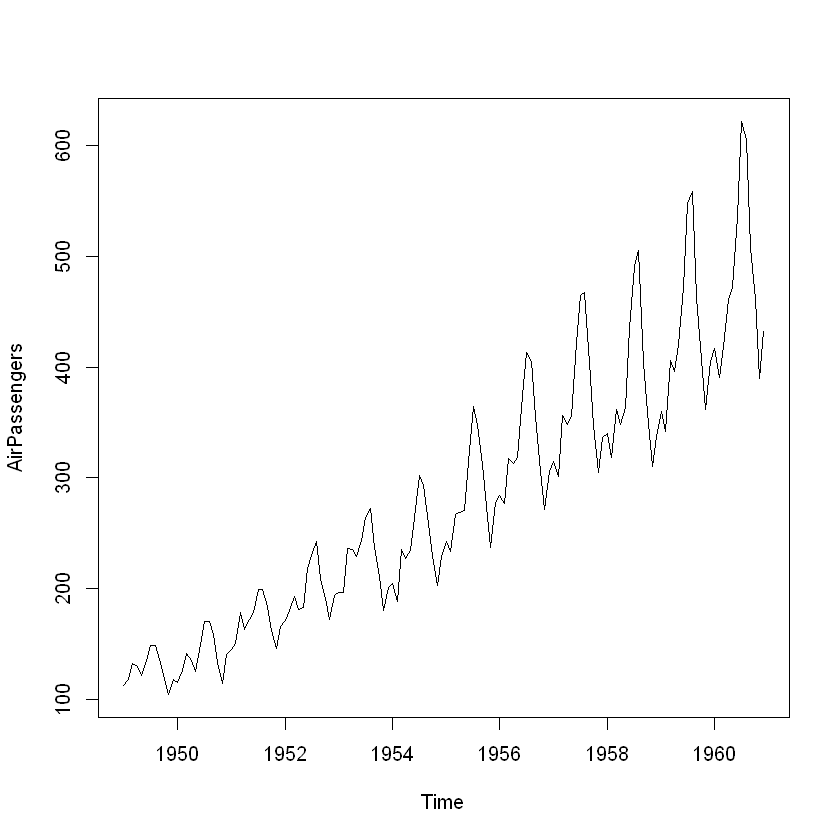

In [59]:
# Consider the AirPassengers dataset,
# which records the total international airline passengers in thousands by month
plot(AirPassengers)

In [60]:
# The frequency function returns the the number samples per unit time
frequency(AirPassengers)
# We can see that in this dataset, each unit time has twelve observations; in this case, twelve months.

# The start() function returns the time index of the first observation.
# The end() function returns the time index of the last observation.
start(AirPassengers)
end(AirPassengers)
# We can see that the first observation is the first month of the year 1949,
# and the last observation is the twelfth month of the year 1960.

# The deltat() function returns the time interval between each observation.
deltat(AirPassengers)
# In our case, we are breaking down observations by month.
# Therefore, we have 1/12 = 0.083 observations within each year; this is the deltat value.

[1] 12

[1] 1949    1

[1] 1960   12

[1] 0.08333333

In [61]:
# The time() function returns a vector of times at which each observation was sampled.
time(AirPassengers)
# Our first observation in 1949 was recorded at 1949.00, followed by 1949.083, then 1949.0167, etc.

# Lastly, the cycle() function returns the position in the cycle for each observation.
# Since our example is monthly, we have a cycle of one year,
# where January is the first position; February is the second, and so on.
cycle(AirPassengers)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,1949.000,1949.083,1949.167,1949.250,1949.333,1949.417,1949.500,1949.583,1949.667,1949.750,1949.833,1949.917
1950,1950.000,1950.083,1950.167,1950.250,1950.333,1950.417,1950.500,1950.583,1950.667,1950.750,1950.833,1950.917
1951,1951.000,1951.083,1951.167,1951.250,1951.333,1951.417,1951.500,1951.583,1951.667,1951.750,1951.833,1951.917
1952,1952.000,1952.083,1952.167,1952.250,1952.333,1952.417,1952.500,1952.583,1952.667,1952.750,1952.833,1952.917
1953,1953.000,1953.083,1953.167,1953.250,1953.333,1953.417,1953.500,1953.583,1953.667,1953.750,1953.833,1953.917
1954,1954.000,1954.083,1954.167,1954.250,1954.333,1954.417,1954.500,1954.583,1954.667,1954.750,1954.833,1954.917
1955,1955.000,1955.083,1955.167,1955.250,1955.333,1955.417,1955.500,1955.583,1955.667,1955.750,1955.833,1955.917
1956,1956.000,1956.083,1956.167,1956.250,1956.333,1956.417,1956.500,1956.583,1956.667,1956.750,1956.833,1956.917
1957,1957.000,1957.083,1957.167,1957.250,1957.333,1957.417,1957.500,1957.583,1957.667,1957.750,1957.833,1957.917
1958,1958.000,1958.083,1958.167,1958.250,1958.333,1958.417,1958.500,1958.583,1958.667,1958.750,1958.833,1958.917


ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,1,2,3,4,5,6,7,8,9,10,11,12
1950,1,2,3,4,5,6,7,8,9,10,11,12
1951,1,2,3,4,5,6,7,8,9,10,11,12
1952,1,2,3,4,5,6,7,8,9,10,11,12
1953,1,2,3,4,5,6,7,8,9,10,11,12
1954,1,2,3,4,5,6,7,8,9,10,11,12
1955,1,2,3,4,5,6,7,8,9,10,11,12
1956,1,2,3,4,5,6,7,8,9,10,11,12
1957,1,2,3,4,5,6,7,8,9,10,11,12
1958,1,2,3,4,5,6,7,8,9,10,11,12


# Missing Data in Time Series

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


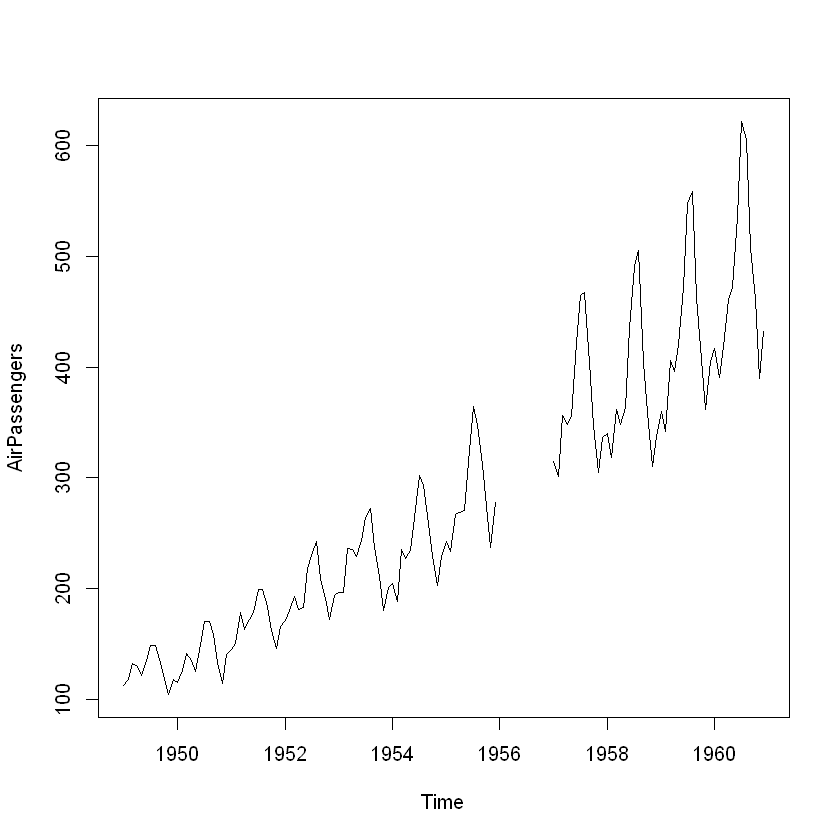

In [1]:
# Suppose were missing data from the year 1956
AirPassengers[85:96] <- NA
AirPassengers
plot(AirPassengers)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112.0000,118.0000,132.0000,129.0000,121.0000,135.0000,148.0000,148.0000,136.0000,119.0000,104.0000,118.0000
1950,115.0000,126.0000,141.0000,135.0000,125.0000,149.0000,170.0000,170.0000,158.0000,133.0000,114.0000,140.0000
1951,145.0000,150.0000,178.0000,163.0000,172.0000,178.0000,199.0000,199.0000,184.0000,162.0000,146.0000,166.0000
1952,171.0000,180.0000,193.0000,181.0000,183.0000,218.0000,230.0000,242.0000,209.0000,191.0000,172.0000,194.0000
1953,196.0000,196.0000,236.0000,235.0000,229.0000,243.0000,264.0000,272.0000,237.0000,211.0000,180.0000,201.0000
1954,204.0000,188.0000,235.0000,227.0000,234.0000,264.0000,302.0000,293.0000,259.0000,229.0000,203.0000,229.0000
1955,242.0000,233.0000,267.0000,269.0000,270.0000,315.0000,364.0000,347.0000,312.0000,274.0000,237.0000,278.0000
1956,280.2986,280.2986,280.2986,280.2986,280.2986,280.2986,280.2986,280.2986,280.2986,280.2986,280.2986,280.2986
1957,315.0000,301.0000,356.0000,348.0000,355.0000,422.0000,465.0000,467.0000,404.0000,347.0000,305.0000,336.0000
1958,340.0000,318.0000,362.0000,348.0000,363.0000,435.0000,491.0000,505.0000,404.0000,359.0000,310.0000,337.0000


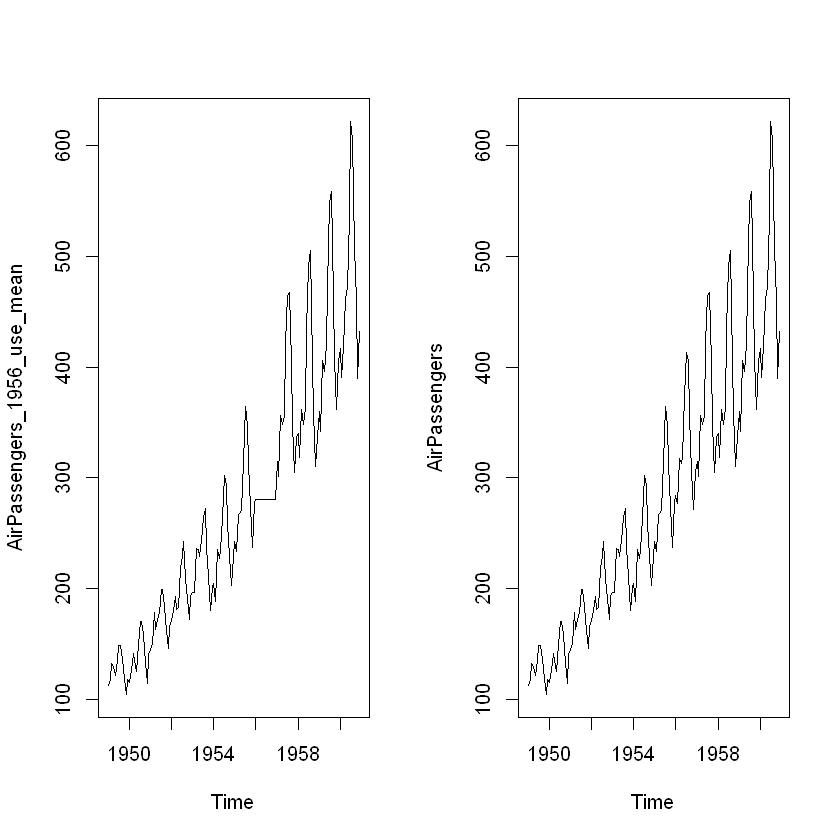

In [22]:
# In certain cases, we simply replace missing values with means, medians, or other types of averages.
AirPassengers_1956_use_mean <- AirPassengers
AirPassengers_1956_use_mean[85:96] <- mean(AirPassengers, na.rm = TRUE) # remove NA values, as this breaks the mean() function.
AirPassengers_1956_use_mean
par(mfrow=c(1,2))
plot(AirPassengers_1956_use_mean)
plot(AirPassengers)
# In our case, we can observe that the mean poorly reflects what existing data should look like.